# Population Dynamics with SciPy

## 0. What is SciPy?

SciPy (meaning Scientific Python) is a computation library built on NumPy. It is a rich source of utility functions for optimization, statistics and signal processing.

SciPy provides many built-in scientific constants (e.g. $\pi$, or expressing a specified unit in terms of another standard unit like degree in radians), which can be useful in various situations. To use constants, we first need to import the module 'constants'.


### 0.1 Examples: using constants

In [1]:
from scipy import constants

#return the value of the constant pi
print(constants.pi)

#express a unit of mass in kg
print(constants.gram)

#express a unit of angle in radians
print(constants.degree)

3.141592653589793
0.001
0.017453292519943295


### 0.2 Examples: optimizing functions

#### Finding roots using NumPy and SciPy
    
Let's find the square root of 7 by numerically solving the equation $x^2-7=0$. 

This can be done by finding the roots of the function $f(x)=x^2-7$, meaning we want to find the values of x such that evaluating f at these values would return f=0. This will give us the value $x=\sqrt{7}$. 

One possible way to do this is by means of the Newton Raphson root finding method, that is explained next.

**The Newton Raphson root finding method**

To find the square root of 7 we can start with an initial guess, $x_1$ as the root of $f(x)$

The slope of the tangent to $f(x)$ at $x_1$ is: 

$$ f' (x_1) =  \frac{f(x_2) - f(x_1)}{(x_2 - x_1)} $$

To find the intercept of this slope on the X axis, we input $f(x_2) = 0$ in the above equation to obtain:

$$ x_2 = x_1 - \frac{f(x_1)}{f'(x_1)}$$

We repeat this operation iteratively, until convergence: the method converges towards the root of the function.

An illustration from the Wikipedia page on the [Newton's method](https://en.wikipedia.org/wiki/Newton's_method).

<img src=https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif>

Let's now plot our function and try to visually determine the solution.

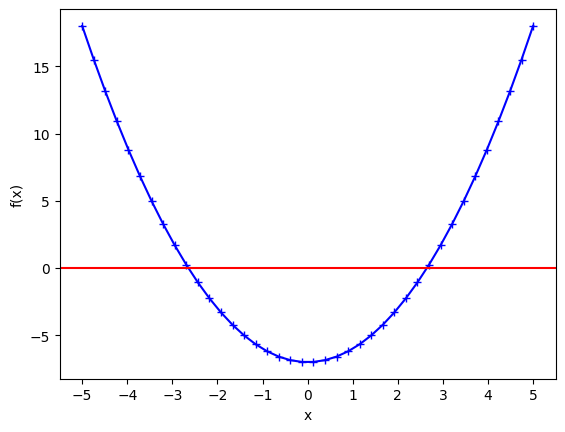

In [2]:
#plotting our function
import numpy as np
import matplotlib.pyplot as plt
#start by defining the number of points (N) within a predefined range of x values  
#increase N to increase the resolution

N = 40 
x = np.linspace(-5, 5, N)
#print(x)

f=x**2-7


plt.plot(x,f, marker="+", color="b")
plt.axhline(0, color="r")

plt.xticks(np.arange(-5,5.1,1))
#plt.grid()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [3]:
print(x)

[-5.         -4.74358974 -4.48717949 -4.23076923 -3.97435897 -3.71794872
 -3.46153846 -3.20512821 -2.94871795 -2.69230769 -2.43589744 -2.17948718
 -1.92307692 -1.66666667 -1.41025641 -1.15384615 -0.8974359  -0.64102564
 -0.38461538 -0.12820513  0.12820513  0.38461538  0.64102564  0.8974359
  1.15384615  1.41025641  1.66666667  1.92307692  2.17948718  2.43589744
  2.69230769  2.94871795  3.20512821  3.46153846  3.71794872  3.97435897
  4.23076923  4.48717949  4.74358974  5.        ]


We can see that the function f is equal to zero somewhere in the vicinity of $x=2.69$. Let's guess that the solution is 2.69 and check if we're close to the solution.

In [4]:
#evaluate f at our guess x=2.69
2.69**2

7.2360999999999995

We are rather close but we slightly overestimated the value of x.

Another attempt: let's try to simply find the value of x such that $|f(x)|$ attains the minimum. The result will depend on the resolution of x (i.e., the parameter N; see above).

In [5]:
#first find the index of the vector f such that abs(f) attains the minimum value  
index_MinAbsf=np.argmin(np.abs(f))
#check the value of abs(f) at this index; if 0, we're done; otherwise, we'd need to improve the resolution of x
print(np.abs(f[index_MinAbsf]))

#print out also the value of x at which this minimum is attained
print(x[index_MinAbsf])

#also, print out the value of x^2 for this x
print(x[index_MinAbsf]**2)

0.24852071005916798
2.6923076923076916
7.248520710059168


We see this solution is not very accurate. To find a better solution, we can increase the resolution of x (by increasing N above). Try this. 

In [6]:
#Your code here


Alternatively, we can apply the Newton Raphson method. Let's first use loops to do this. In this case, the convergence is rather fast (already tested), so it is 'safe' to use a loop here. 

In [7]:
#initial guess
x_n = -4
#counter for the number of iterations in the loop (initialise it at 0, and increase by one in each iteration)
count = 0
#maximal number of iterations we want to allow (otherwise this can go on infinitely long if we imposed ill stopping conditions)
max_count=100

#this is the exit condition (initialise it at 0, and loop until it becomes 1; remember to define the condition in the loop for this parameter to become 1!)
exit_cond=0

while exit_cond != 1:
    #apply the Newton Raphson iterative method above 
    f_n = x_n**2 - 7
    f_n_dx = 2*x_n # f'(x) = 2x
    
    x_np1 = x_n - f_n/f_n_dx
    
    #print out results in each iteration to follow the progress: number of iteration, starting value of x, new value of x
    print(count, x_n, x_np1)
    
    #increase the iteration counter by 1
    count += 1
    
    #This is quite important: exit conditions!
    #The main exit condition concerns convergence: if the old and the new value of x are very very close to each other, then exit
    #Here, 'close' is to be set by the user
    #I will call the two 'close' when the absolute value of the difference between them is smaller than, or equal to 10^(-8), arguably a very small number (can be modified, but with care!)  
    
    if np.abs((x_n-x_np1))<=1e-8:
        exit_cond=1 #This means: yes, exit!
        
        #the next line is also important: if we have not reached the above condition within a reasonable time (number of iterations), then require to exit
    elif count == max_count:
            exit_cond=1
        
    #Finally, remember to treat x_np1 as the new input value for the next iteration
    x_n = x_np1
    
print(x_np1)  

0 -4 -2.875
1 -2.875 -2.654891304347826
2 -2.654891304347826 -2.6457670441902894
3 -2.6457670441902894 -2.6457513111113693
4 -2.6457513111113693 -2.6457513110645907
-2.6457513110645907


So, we needed only 5 iterations to reach convergence. Check how close the result is to the actual solution by evaluating $x_n^2$ (we want this to be very very close to 7).

In [8]:
print(x_n**2)

7.000000000000001


Perfect, we are indeed very close to what we were looking for. 

In general, however, achieving convergence in a pure Python-loop mode can be a long process, and we'd like to avoid this whenever possible. 

**Solving the problem using SciPy**

Luckily, there are a number of optimization functions in SciPy that are more efficient than loops in pure Pyhton.

More detailed information about the different optimization methods can be found at <a href="https://docs.scipy.org/doc/scipy/reference/optimize.html">Optimization and Root Finding</a>

Let's try to solve the above problem using the *newton* module in SciPy.

In [9]:
#use the Newton Raphson root finding iterative method in SciPy
    
from scipy.optimize import newton

def ex_function(x):
    return x**2-7
#take 1 as an initial guess
f_roots_newton1=newton(ex_function, 1)
print(f_roots_newton1)

#now take -1 as an initial guess
f_roots_newton2=newton(ex_function, -1)
print(f_roots_newton2)



2.6457513110645907
-2.6457513110645907


Of course, there are two roots of $f$, symmetric around 0, which we find by starting at a positive or a negative initial guess.

How good are these solutions?

In [10]:
print(f_roots_newton1**2)
print(f_roots_newton2**2)

7.000000000000001
7.000000000000001


**Exercise 1**

Use SciPy to find the roots of the function $f=x^4+2*x^2-6$.

First plot the function for x ranging from -7 to 7. If it is difficult to visualize zeros of the function, you'll need to adjust the range on the x axis. 

In [11]:
#Your code here for visualizing the function


In [12]:
#Now make a guess for the root(s) of f.
#Plug this guess back in the equation for f to see if your guess is close to the solution we're looking for.
#Print the output.
#Insert your code here

In [13]:
#Now use SciPy newton module to find the roots of this function.
#Your code here:



#Print the solutions and check that they are indeed what you were looking for (i.e., plug them back in the original equation and evaluate f).
#Your code here:


#### Finding minima/maxima of a function

We can also ask where are the minima and/or the maxima of a given function. 
This is done using the module minimize. 
The basic arguments for the minimize() function are as follows:
- fun - which is the function for which you want to find minima
- x0 - an initial guess
- method - name of the minimization method you'd like to use. Possible values for this argument are:
    - 'CG' (conjugate gradient algorithm)
    - 'BFGS' (Broyden, Fletcher, Goldfarb, Shanno algorithm - for convex optimization problems with single optima)
    - 'Newton-CG' (Newton conjugate gradient algorithm)
    - 'L-BFGS-B' (limited memory BFGS)
    - 'TNC'(Truncated Newton Method)
    - 'COBYLA' (Constrained Optimization BY Linear Approximation)
    - 'SLSQP' (Sequential Least SQuares Programming)
 
Refer to <a href="https://docs.scipy.org/doc/scipy/reference/optimize.html">Optimization and Root Finding</a> (same source as provided above) for more information about these methods.
 
 Let's try to find the minima of our function $f(x)=x^2-7$, using BFGS method, for example. What do we expect? The solution should be $x=0$.


In [14]:
from scipy.optimize import minimize

min_f=minimize(ex_function,1,method='BFGS')
print(min_f.x)

[-9.44232006e-09]


This is very very close to zero, and this is what we'd expect given some numerical imprecision.


**Exercise 2**

Find the minima of the function $f=x^4+2*x^2-6$. 

In [15]:
#Your code here:

#### Solving an ordinary differential equation (ODE) 

SciPy has a built in function that solves an ordinary differential equation (ODE), or a system of ODEs, by numerical integration.

Here we will start with a few examples of a single ODE.

${\color{blue}{\underline{\rm{Solving~an~ODE:Example~1}}}}$ 

Consider the following ODE:

$$\frac{{\rm d}y(t)}{{\rm d}t}=\frac{-y(t)+1}{10}$$

with the initial condition

$$y(0)=0$$.

Solve for $y(t)$.

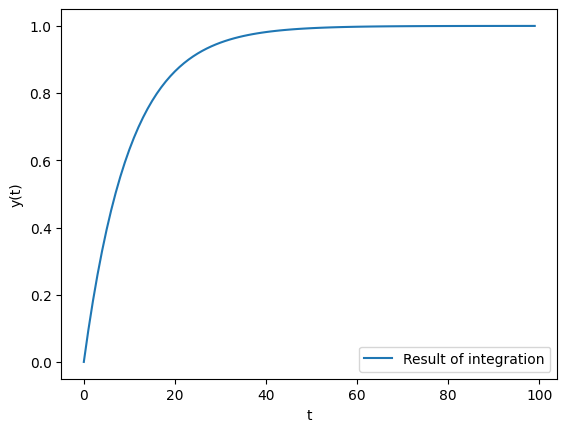

In [16]:
from math import cos
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


#define the function
def function1(y,t):
    dydt=-y/10+1/10
    return dydt

#initial condition
y0=0

#give the range of points over which to integrate
t=np.arange(100)
res1=odeint(function1, y0, t)
y = res1


plt.plot(np.arange(100), y , label="Result of integration")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.show()

${\color{blue}{\underline{\rm{Solving~an~ODE:Example~2}}}}$ 

Now consider a slightly different ODE:

$$\frac{{\rm d}y(t)}{{\rm d}t}=\frac{-y(t)+u(t)}{10}$$,

where $u(t)=0~{\rm for}~t<10$, and $u(t)=2~{\rm for}~t\ge 10$. The initial condition is $y(0)=1$.

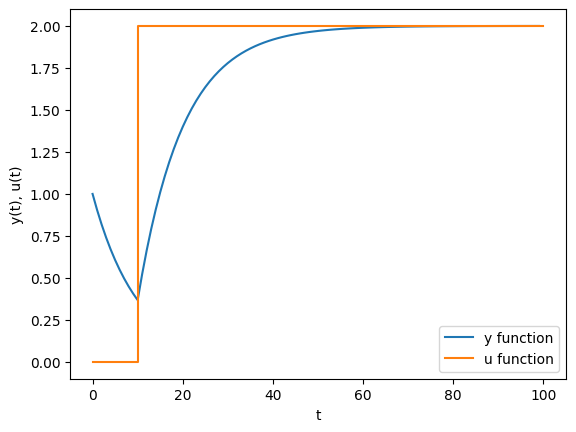

In [17]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#define the function
def function2(y,t):
    #first define u(t)
    if t<10:
        u=0
    else:
        u=2
    dydt=-y/10+u/10
    return dydt

#initial condition
y0=1


#give the range of points over which to integrate
t=np.arange(100)
resY=odeint(function2, y0, t)
y = resY

#plot the solution together with u(t)
plt.plot(np.arange(100), y[np.arange(100)] , label="y function")
plt.plot([0, 10 , 10, 100], [0, 0, 2, 2], label="u function")
plt.xlabel("t")
plt.ylabel("y(t), u(t)")
plt.legend()
plt.show()

${\color{blue}{\underline{\rm{Solving~a~system~of~ODEs:Example~3}}}}$ 


Solve the following system of ODEs:

$$2\frac{{\rm d}{x(t)}}{{\rm d}t}=-x(t)+u(t)$$,

$$5\frac{{\rm d}{y(t)}}{{\rm d}t}=-y(t)+x(t)$$,

where $u(t<5)=0$, $u(t\ge 5)=2$, and $x(0)=y(0)=0$.


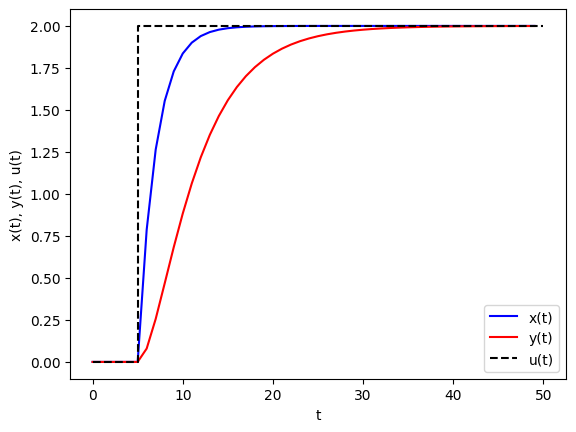

In [18]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#define the function
def function3(Y,t):
    #first define u(t)
    if t<5:
        u=0
    else:
        u=2
        
    #define Y in terms of y, x
    [x, y] = Y
    
    dxdt=-x/2+u/2
    dydt=-y/5+x/5
    return [dxdt, dydt]

#initial condition for the composite variable Y
x0=0
y0=0
Y0=[x0, y0]

t=np.arange(100)
res_syst=odeint(function3,Y0,t)
[x, y]=res_syst.T

#print the solution
plt.plot(np.arange(50), x[np.arange(50)] , color="b", label="x(t)")
plt.plot(np.arange(50), y[np.arange(50)] , color="r", label="y(t)")

plt.plot([0, 5 , 5, 50], [0, 0, 2, 2], color="k", linestyle="dashed", label="u(t)")
plt.xlabel("t")
plt.ylabel("x(t), y(t), u(t)")
plt.legend()
plt.show()